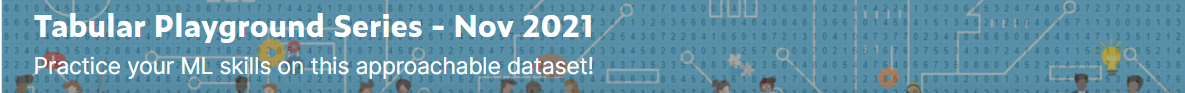

In [60]:
import seaborn as sns
import sys
import csv
import datetime
import operator
import joblib
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import norm, skew, probplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import StratifiedKFold

In [61]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [62]:
from sklearn.model_selection import train_test_split

random_state_val =42
test_size_val =0.2
train,validation = train_test_split(df_train, test_size = test_size_val, random_state = random_state_val)

In [63]:
y_nm = 'target'

df_train_x = train.drop(y_nm, axis = 1)
df_train_y = pd.DataFrame(train[y_nm])

df_val_x = validation.drop(y_nm, axis = 1)
df_val_y = pd.DataFrame(validation[y_nm])

df_test_x = df_test

In [65]:
df_train_x.shape, df_val_x.shape

((480000, 101), (120000, 101))

In [66]:
num_cols = [col for col in df_train_x.columns if df_train_x[col].dtype in ["float16","float32","float64"]]
cat_cols = [col for col in df_train_x.columns if df_train_x[col].dtype not in ["float16","float32","float64"]]

In [55]:
y = train["target"].copy()

for cols in cat_cols:
    enc = TargetEncoder(cols=[cols])
    df_train_x = enc.fit_transform(df_train_x, y)
    df_val_x = enc.transform(df_val_x)
    df_test_x = enc.transform(df_test_x)

In [56]:
scaler = QuantileTransformer()
scaler.fit(df_train_x)
df_train_x = pd.DataFrame(scaler.transform(df_train_x))
df_val_x = pd.DataFrame(scaler.transform(df_val_x))
df_test_x = pd.DataFrame(scaler.transform(df_test_x))

In [57]:
XGBClassifier = xgb.XGBClassifier(max_depth = 5,
                                 learning_rate = 0.01,
                                 n_estimators = 10000,
                                 objective = 'binary:logistic',
                                 tree_method = 'gpu_hist',
                                 gamma = 0,
                                 min_child_weight = 1,
                                 subsample = 0.8,
                                 colsample_bytree = 0.8,
                                 n_jobs = -1
                                 )

In [58]:
start = datetime.datetime.now()
xgb = XGBClassifier.fit(df_train_x.values,
                       df_train_y.values.ravel(),
                       eval_set = [(df_train_x.values, df_train_y), (df_val_x.values, df_val_y)], 
                       eval_metric = 'auc',
                       early_stopping_rounds = 15,
                       verbose = True)
end = datetime.datetime.now()
end-start

[0]	validation_0-auc:0.61495	validation_1-auc:0.61191
[1]	validation_0-auc:0.64162	validation_1-auc:0.63727
[2]	validation_0-auc:0.64498	validation_1-auc:0.64079
[3]	validation_0-auc:0.64781	validation_1-auc:0.64307
[4]	validation_0-auc:0.65007	validation_1-auc:0.64476
[5]	validation_0-auc:0.65000	validation_1-auc:0.64481
[6]	validation_0-auc:0.64981	validation_1-auc:0.64431
[7]	validation_0-auc:0.65208	validation_1-auc:0.64684
[8]	validation_0-auc:0.65224	validation_1-auc:0.64688
[9]	validation_0-auc:0.65480	validation_1-auc:0.64956
[10]	validation_0-auc:0.65437	validation_1-auc:0.64923
[11]	validation_0-auc:0.65454	validation_1-auc:0.64916
[12]	validation_0-auc:0.65485	validation_1-auc:0.64953
[13]	validation_0-auc:0.65464	validation_1-auc:0.64932
[14]	validation_0-auc:0.65583	validation_1-auc:0.65055
[15]	validation_0-auc:0.65662	validation_1-auc:0.65141
[16]	validation_0-auc:0.65658	validation_1-auc:0.65133
[17]	validation_0-auc:0.65685	validation_1-auc:0.65161
[18]	validation_0-au

[149]	validation_0-auc:0.69271	validation_1-auc:0.68490
[150]	validation_0-auc:0.69293	validation_1-auc:0.68508
[151]	validation_0-auc:0.69310	validation_1-auc:0.68523
[152]	validation_0-auc:0.69331	validation_1-auc:0.68543
[153]	validation_0-auc:0.69357	validation_1-auc:0.68569
[154]	validation_0-auc:0.69372	validation_1-auc:0.68583
[155]	validation_0-auc:0.69388	validation_1-auc:0.68598
[156]	validation_0-auc:0.69402	validation_1-auc:0.68611
[157]	validation_0-auc:0.69427	validation_1-auc:0.68635
[158]	validation_0-auc:0.69444	validation_1-auc:0.68652
[159]	validation_0-auc:0.69466	validation_1-auc:0.68672
[160]	validation_0-auc:0.69488	validation_1-auc:0.68691
[161]	validation_0-auc:0.69508	validation_1-auc:0.68708
[162]	validation_0-auc:0.69526	validation_1-auc:0.68724
[163]	validation_0-auc:0.69547	validation_1-auc:0.68742
[164]	validation_0-auc:0.69571	validation_1-auc:0.68765
[165]	validation_0-auc:0.69588	validation_1-auc:0.68783
[166]	validation_0-auc:0.69613	validation_1-auc:

[296]	validation_0-auc:0.71430	validation_1-auc:0.70473
[297]	validation_0-auc:0.71436	validation_1-auc:0.70477
[298]	validation_0-auc:0.71445	validation_1-auc:0.70485
[299]	validation_0-auc:0.71453	validation_1-auc:0.70493
[300]	validation_0-auc:0.71463	validation_1-auc:0.70501
[301]	validation_0-auc:0.71473	validation_1-auc:0.70508
[302]	validation_0-auc:0.71483	validation_1-auc:0.70518
[303]	validation_0-auc:0.71496	validation_1-auc:0.70530
[304]	validation_0-auc:0.71503	validation_1-auc:0.70534
[305]	validation_0-auc:0.71512	validation_1-auc:0.70544
[306]	validation_0-auc:0.71525	validation_1-auc:0.70556
[307]	validation_0-auc:0.71538	validation_1-auc:0.70567
[308]	validation_0-auc:0.71548	validation_1-auc:0.70576
[309]	validation_0-auc:0.71561	validation_1-auc:0.70586
[310]	validation_0-auc:0.71566	validation_1-auc:0.70591
[311]	validation_0-auc:0.71578	validation_1-auc:0.70601
[312]	validation_0-auc:0.71589	validation_1-auc:0.70611
[313]	validation_0-auc:0.71597	validation_1-auc:

[443]	validation_0-auc:0.72667	validation_1-auc:0.71537
[444]	validation_0-auc:0.72671	validation_1-auc:0.71540
[445]	validation_0-auc:0.72679	validation_1-auc:0.71548
[446]	validation_0-auc:0.72685	validation_1-auc:0.71553
[447]	validation_0-auc:0.72691	validation_1-auc:0.71560
[448]	validation_0-auc:0.72698	validation_1-auc:0.71565
[449]	validation_0-auc:0.72702	validation_1-auc:0.71569
[450]	validation_0-auc:0.72710	validation_1-auc:0.71576
[451]	validation_0-auc:0.72718	validation_1-auc:0.71582
[452]	validation_0-auc:0.72727	validation_1-auc:0.71588
[453]	validation_0-auc:0.72733	validation_1-auc:0.71593
[454]	validation_0-auc:0.72739	validation_1-auc:0.71600
[455]	validation_0-auc:0.72744	validation_1-auc:0.71604
[456]	validation_0-auc:0.72752	validation_1-auc:0.71609
[457]	validation_0-auc:0.72759	validation_1-auc:0.71616
[458]	validation_0-auc:0.72764	validation_1-auc:0.71619
[459]	validation_0-auc:0.72770	validation_1-auc:0.71625
[460]	validation_0-auc:0.72775	validation_1-auc:

[590]	validation_0-auc:0.73498	validation_1-auc:0.72220
[591]	validation_0-auc:0.73503	validation_1-auc:0.72224
[592]	validation_0-auc:0.73506	validation_1-auc:0.72226
[593]	validation_0-auc:0.73511	validation_1-auc:0.72230
[594]	validation_0-auc:0.73516	validation_1-auc:0.72234
[595]	validation_0-auc:0.73521	validation_1-auc:0.72238
[596]	validation_0-auc:0.73524	validation_1-auc:0.72240
[597]	validation_0-auc:0.73527	validation_1-auc:0.72242
[598]	validation_0-auc:0.73532	validation_1-auc:0.72246
[599]	validation_0-auc:0.73537	validation_1-auc:0.72250
[600]	validation_0-auc:0.73541	validation_1-auc:0.72254
[601]	validation_0-auc:0.73546	validation_1-auc:0.72258
[602]	validation_0-auc:0.73551	validation_1-auc:0.72262
[603]	validation_0-auc:0.73555	validation_1-auc:0.72265
[604]	validation_0-auc:0.73561	validation_1-auc:0.72269
[605]	validation_0-auc:0.73566	validation_1-auc:0.72272
[606]	validation_0-auc:0.73570	validation_1-auc:0.72276
[607]	validation_0-auc:0.73574	validation_1-auc:

[737]	validation_0-auc:0.74105	validation_1-auc:0.72705
[738]	validation_0-auc:0.74110	validation_1-auc:0.72708
[739]	validation_0-auc:0.74113	validation_1-auc:0.72712
[740]	validation_0-auc:0.74116	validation_1-auc:0.72713
[741]	validation_0-auc:0.74120	validation_1-auc:0.72716
[742]	validation_0-auc:0.74124	validation_1-auc:0.72718
[743]	validation_0-auc:0.74128	validation_1-auc:0.72721
[744]	validation_0-auc:0.74131	validation_1-auc:0.72723
[745]	validation_0-auc:0.74135	validation_1-auc:0.72726
[746]	validation_0-auc:0.74139	validation_1-auc:0.72730
[747]	validation_0-auc:0.74144	validation_1-auc:0.72734
[748]	validation_0-auc:0.74147	validation_1-auc:0.72736
[749]	validation_0-auc:0.74152	validation_1-auc:0.72739
[750]	validation_0-auc:0.74156	validation_1-auc:0.72743
[751]	validation_0-auc:0.74159	validation_1-auc:0.72745
[752]	validation_0-auc:0.74162	validation_1-auc:0.72748
[753]	validation_0-auc:0.74166	validation_1-auc:0.72751
[754]	validation_0-auc:0.74170	validation_1-auc:

[884]	validation_0-auc:0.74583	validation_1-auc:0.73065
[885]	validation_0-auc:0.74587	validation_1-auc:0.73067
[886]	validation_0-auc:0.74590	validation_1-auc:0.73070
[887]	validation_0-auc:0.74593	validation_1-auc:0.73072
[888]	validation_0-auc:0.74596	validation_1-auc:0.73075
[889]	validation_0-auc:0.74598	validation_1-auc:0.73076
[890]	validation_0-auc:0.74602	validation_1-auc:0.73078
[891]	validation_0-auc:0.74605	validation_1-auc:0.73081
[892]	validation_0-auc:0.74608	validation_1-auc:0.73083
[893]	validation_0-auc:0.74613	validation_1-auc:0.73086
[894]	validation_0-auc:0.74616	validation_1-auc:0.73088
[895]	validation_0-auc:0.74619	validation_1-auc:0.73090
[896]	validation_0-auc:0.74622	validation_1-auc:0.73092
[897]	validation_0-auc:0.74625	validation_1-auc:0.73094
[898]	validation_0-auc:0.74628	validation_1-auc:0.73095
[899]	validation_0-auc:0.74630	validation_1-auc:0.73097
[900]	validation_0-auc:0.74633	validation_1-auc:0.73099
[901]	validation_0-auc:0.74635	validation_1-auc:

[1030]	validation_0-auc:0.74977	validation_1-auc:0.73346
[1031]	validation_0-auc:0.74978	validation_1-auc:0.73347
[1032]	validation_0-auc:0.74982	validation_1-auc:0.73349
[1033]	validation_0-auc:0.74983	validation_1-auc:0.73350
[1034]	validation_0-auc:0.74986	validation_1-auc:0.73352
[1035]	validation_0-auc:0.74988	validation_1-auc:0.73352
[1036]	validation_0-auc:0.74990	validation_1-auc:0.73353
[1037]	validation_0-auc:0.74992	validation_1-auc:0.73355
[1038]	validation_0-auc:0.74994	validation_1-auc:0.73356
[1039]	validation_0-auc:0.74997	validation_1-auc:0.73358
[1040]	validation_0-auc:0.74999	validation_1-auc:0.73359
[1041]	validation_0-auc:0.75001	validation_1-auc:0.73360
[1042]	validation_0-auc:0.75004	validation_1-auc:0.73362
[1043]	validation_0-auc:0.75005	validation_1-auc:0.73364
[1044]	validation_0-auc:0.75007	validation_1-auc:0.73365
[1045]	validation_0-auc:0.75010	validation_1-auc:0.73367
[1046]	validation_0-auc:0.75012	validation_1-auc:0.73369
[1047]	validation_0-auc:0.75014

[1174]	validation_0-auc:0.75296	validation_1-auc:0.73555
[1175]	validation_0-auc:0.75298	validation_1-auc:0.73556
[1176]	validation_0-auc:0.75300	validation_1-auc:0.73557
[1177]	validation_0-auc:0.75303	validation_1-auc:0.73559
[1178]	validation_0-auc:0.75304	validation_1-auc:0.73559
[1179]	validation_0-auc:0.75305	validation_1-auc:0.73560
[1180]	validation_0-auc:0.75307	validation_1-auc:0.73561
[1181]	validation_0-auc:0.75310	validation_1-auc:0.73563
[1182]	validation_0-auc:0.75312	validation_1-auc:0.73564
[1183]	validation_0-auc:0.75314	validation_1-auc:0.73565
[1184]	validation_0-auc:0.75316	validation_1-auc:0.73568
[1185]	validation_0-auc:0.75319	validation_1-auc:0.73569
[1186]	validation_0-auc:0.75322	validation_1-auc:0.73571
[1187]	validation_0-auc:0.75324	validation_1-auc:0.73573
[1188]	validation_0-auc:0.75325	validation_1-auc:0.73574
[1189]	validation_0-auc:0.75328	validation_1-auc:0.73575
[1190]	validation_0-auc:0.75330	validation_1-auc:0.73577
[1191]	validation_0-auc:0.75332

[1318]	validation_0-auc:0.75577	validation_1-auc:0.73731
[1319]	validation_0-auc:0.75578	validation_1-auc:0.73732
[1320]	validation_0-auc:0.75580	validation_1-auc:0.73733
[1321]	validation_0-auc:0.75582	validation_1-auc:0.73734
[1322]	validation_0-auc:0.75584	validation_1-auc:0.73735
[1323]	validation_0-auc:0.75585	validation_1-auc:0.73736
[1324]	validation_0-auc:0.75587	validation_1-auc:0.73737
[1325]	validation_0-auc:0.75589	validation_1-auc:0.73739
[1326]	validation_0-auc:0.75591	validation_1-auc:0.73740
[1327]	validation_0-auc:0.75593	validation_1-auc:0.73741
[1328]	validation_0-auc:0.75595	validation_1-auc:0.73742
[1329]	validation_0-auc:0.75596	validation_1-auc:0.73743
[1330]	validation_0-auc:0.75598	validation_1-auc:0.73744
[1331]	validation_0-auc:0.75600	validation_1-auc:0.73745
[1332]	validation_0-auc:0.75601	validation_1-auc:0.73746
[1333]	validation_0-auc:0.75602	validation_1-auc:0.73747
[1334]	validation_0-auc:0.75604	validation_1-auc:0.73748
[1335]	validation_0-auc:0.75606

[1462]	validation_0-auc:0.75820	validation_1-auc:0.73881
[1463]	validation_0-auc:0.75821	validation_1-auc:0.73881
[1464]	validation_0-auc:0.75823	validation_1-auc:0.73882
[1465]	validation_0-auc:0.75824	validation_1-auc:0.73883
[1466]	validation_0-auc:0.75826	validation_1-auc:0.73884
[1467]	validation_0-auc:0.75828	validation_1-auc:0.73885
[1468]	validation_0-auc:0.75830	validation_1-auc:0.73886
[1469]	validation_0-auc:0.75831	validation_1-auc:0.73887
[1470]	validation_0-auc:0.75833	validation_1-auc:0.73888
[1471]	validation_0-auc:0.75835	validation_1-auc:0.73889
[1472]	validation_0-auc:0.75836	validation_1-auc:0.73889
[1473]	validation_0-auc:0.75838	validation_1-auc:0.73891
[1474]	validation_0-auc:0.75839	validation_1-auc:0.73892
[1475]	validation_0-auc:0.75841	validation_1-auc:0.73893
[1476]	validation_0-auc:0.75843	validation_1-auc:0.73894
[1477]	validation_0-auc:0.75844	validation_1-auc:0.73896
[1478]	validation_0-auc:0.75846	validation_1-auc:0.73897
[1479]	validation_0-auc:0.75848

[1606]	validation_0-auc:0.76034	validation_1-auc:0.74006
[1607]	validation_0-auc:0.76035	validation_1-auc:0.74006
[1608]	validation_0-auc:0.76036	validation_1-auc:0.74007
[1609]	validation_0-auc:0.76037	validation_1-auc:0.74008
[1610]	validation_0-auc:0.76039	validation_1-auc:0.74009
[1611]	validation_0-auc:0.76040	validation_1-auc:0.74010
[1612]	validation_0-auc:0.76042	validation_1-auc:0.74010
[1613]	validation_0-auc:0.76043	validation_1-auc:0.74011
[1614]	validation_0-auc:0.76044	validation_1-auc:0.74011
[1615]	validation_0-auc:0.76046	validation_1-auc:0.74013
[1616]	validation_0-auc:0.76047	validation_1-auc:0.74013
[1617]	validation_0-auc:0.76049	validation_1-auc:0.74014
[1618]	validation_0-auc:0.76050	validation_1-auc:0.74016
[1619]	validation_0-auc:0.76052	validation_1-auc:0.74017
[1620]	validation_0-auc:0.76053	validation_1-auc:0.74017
[1621]	validation_0-auc:0.76054	validation_1-auc:0.74018
[1622]	validation_0-auc:0.76056	validation_1-auc:0.74019
[1623]	validation_0-auc:0.76057

[1750]	validation_0-auc:0.76233	validation_1-auc:0.74112
[1751]	validation_0-auc:0.76234	validation_1-auc:0.74113
[1752]	validation_0-auc:0.76235	validation_1-auc:0.74114
[1753]	validation_0-auc:0.76236	validation_1-auc:0.74114
[1754]	validation_0-auc:0.76237	validation_1-auc:0.74115
[1755]	validation_0-auc:0.76239	validation_1-auc:0.74116
[1756]	validation_0-auc:0.76240	validation_1-auc:0.74116
[1757]	validation_0-auc:0.76241	validation_1-auc:0.74117
[1758]	validation_0-auc:0.76242	validation_1-auc:0.74117
[1759]	validation_0-auc:0.76244	validation_1-auc:0.74118
[1760]	validation_0-auc:0.76245	validation_1-auc:0.74119
[1761]	validation_0-auc:0.76246	validation_1-auc:0.74119
[1762]	validation_0-auc:0.76247	validation_1-auc:0.74120
[1763]	validation_0-auc:0.76249	validation_1-auc:0.74121
[1764]	validation_0-auc:0.76250	validation_1-auc:0.74121
[1765]	validation_0-auc:0.76251	validation_1-auc:0.74122
[1766]	validation_0-auc:0.76252	validation_1-auc:0.74122
[1767]	validation_0-auc:0.76253

[1894]	validation_0-auc:0.76413	validation_1-auc:0.74206
[1895]	validation_0-auc:0.76415	validation_1-auc:0.74207
[1896]	validation_0-auc:0.76416	validation_1-auc:0.74207
[1897]	validation_0-auc:0.76417	validation_1-auc:0.74208
[1898]	validation_0-auc:0.76419	validation_1-auc:0.74208
[1899]	validation_0-auc:0.76420	validation_1-auc:0.74209
[1900]	validation_0-auc:0.76421	validation_1-auc:0.74210
[1901]	validation_0-auc:0.76422	validation_1-auc:0.74211
[1902]	validation_0-auc:0.76423	validation_1-auc:0.74211
[1903]	validation_0-auc:0.76425	validation_1-auc:0.74212
[1904]	validation_0-auc:0.76426	validation_1-auc:0.74213
[1905]	validation_0-auc:0.76428	validation_1-auc:0.74213
[1906]	validation_0-auc:0.76428	validation_1-auc:0.74213
[1907]	validation_0-auc:0.76430	validation_1-auc:0.74214
[1908]	validation_0-auc:0.76431	validation_1-auc:0.74215
[1909]	validation_0-auc:0.76432	validation_1-auc:0.74215
[1910]	validation_0-auc:0.76433	validation_1-auc:0.74216
[1911]	validation_0-auc:0.76434

[2038]	validation_0-auc:0.76583	validation_1-auc:0.74284
[2039]	validation_0-auc:0.76584	validation_1-auc:0.74284
[2040]	validation_0-auc:0.76585	validation_1-auc:0.74285
[2041]	validation_0-auc:0.76586	validation_1-auc:0.74286
[2042]	validation_0-auc:0.76587	validation_1-auc:0.74286
[2043]	validation_0-auc:0.76587	validation_1-auc:0.74286
[2044]	validation_0-auc:0.76589	validation_1-auc:0.74286
[2045]	validation_0-auc:0.76590	validation_1-auc:0.74287
[2046]	validation_0-auc:0.76591	validation_1-auc:0.74287
[2047]	validation_0-auc:0.76592	validation_1-auc:0.74288
[2048]	validation_0-auc:0.76594	validation_1-auc:0.74289
[2049]	validation_0-auc:0.76594	validation_1-auc:0.74289
[2050]	validation_0-auc:0.76596	validation_1-auc:0.74289
[2051]	validation_0-auc:0.76597	validation_1-auc:0.74290
[2052]	validation_0-auc:0.76598	validation_1-auc:0.74291
[2053]	validation_0-auc:0.76599	validation_1-auc:0.74291
[2054]	validation_0-auc:0.76601	validation_1-auc:0.74292
[2055]	validation_0-auc:0.76602

[2182]	validation_0-auc:0.76738	validation_1-auc:0.74354
[2183]	validation_0-auc:0.76739	validation_1-auc:0.74355
[2184]	validation_0-auc:0.76740	validation_1-auc:0.74355
[2185]	validation_0-auc:0.76741	validation_1-auc:0.74356
[2186]	validation_0-auc:0.76742	validation_1-auc:0.74356
[2187]	validation_0-auc:0.76743	validation_1-auc:0.74357
[2188]	validation_0-auc:0.76744	validation_1-auc:0.74357
[2189]	validation_0-auc:0.76745	validation_1-auc:0.74358
[2190]	validation_0-auc:0.76746	validation_1-auc:0.74358
[2191]	validation_0-auc:0.76747	validation_1-auc:0.74358
[2192]	validation_0-auc:0.76748	validation_1-auc:0.74359
[2193]	validation_0-auc:0.76749	validation_1-auc:0.74359
[2194]	validation_0-auc:0.76750	validation_1-auc:0.74360
[2195]	validation_0-auc:0.76751	validation_1-auc:0.74360
[2196]	validation_0-auc:0.76752	validation_1-auc:0.74361
[2197]	validation_0-auc:0.76753	validation_1-auc:0.74361
[2198]	validation_0-auc:0.76754	validation_1-auc:0.74362
[2199]	validation_0-auc:0.76755

[2326]	validation_0-auc:0.76880	validation_1-auc:0.74414
[2327]	validation_0-auc:0.76881	validation_1-auc:0.74414
[2328]	validation_0-auc:0.76882	validation_1-auc:0.74415
[2329]	validation_0-auc:0.76883	validation_1-auc:0.74415
[2330]	validation_0-auc:0.76884	validation_1-auc:0.74415
[2331]	validation_0-auc:0.76885	validation_1-auc:0.74416
[2332]	validation_0-auc:0.76886	validation_1-auc:0.74416
[2333]	validation_0-auc:0.76887	validation_1-auc:0.74417
[2334]	validation_0-auc:0.76888	validation_1-auc:0.74417
[2335]	validation_0-auc:0.76888	validation_1-auc:0.74417
[2336]	validation_0-auc:0.76889	validation_1-auc:0.74418
[2337]	validation_0-auc:0.76890	validation_1-auc:0.74418
[2338]	validation_0-auc:0.76891	validation_1-auc:0.74418
[2339]	validation_0-auc:0.76892	validation_1-auc:0.74419
[2340]	validation_0-auc:0.76893	validation_1-auc:0.74419
[2341]	validation_0-auc:0.76894	validation_1-auc:0.74420
[2342]	validation_0-auc:0.76895	validation_1-auc:0.74420
[2343]	validation_0-auc:0.76896

[2470]	validation_0-auc:0.77017	validation_1-auc:0.74467
[2471]	validation_0-auc:0.77018	validation_1-auc:0.74468
[2472]	validation_0-auc:0.77019	validation_1-auc:0.74468
[2473]	validation_0-auc:0.77019	validation_1-auc:0.74469
[2474]	validation_0-auc:0.77020	validation_1-auc:0.74469
[2475]	validation_0-auc:0.77021	validation_1-auc:0.74469
[2476]	validation_0-auc:0.77022	validation_1-auc:0.74470
[2477]	validation_0-auc:0.77023	validation_1-auc:0.74470
[2478]	validation_0-auc:0.77024	validation_1-auc:0.74470
[2479]	validation_0-auc:0.77025	validation_1-auc:0.74471
[2480]	validation_0-auc:0.77026	validation_1-auc:0.74471
[2481]	validation_0-auc:0.77027	validation_1-auc:0.74471
[2482]	validation_0-auc:0.77028	validation_1-auc:0.74472
[2483]	validation_0-auc:0.77028	validation_1-auc:0.74472
[2484]	validation_0-auc:0.77029	validation_1-auc:0.74472
[2485]	validation_0-auc:0.77030	validation_1-auc:0.74473
[2486]	validation_0-auc:0.77031	validation_1-auc:0.74473
[2487]	validation_0-auc:0.77032

[2614]	validation_0-auc:0.77146	validation_1-auc:0.74516
[2615]	validation_0-auc:0.77146	validation_1-auc:0.74516
[2616]	validation_0-auc:0.77147	validation_1-auc:0.74516
[2617]	validation_0-auc:0.77148	validation_1-auc:0.74517
[2618]	validation_0-auc:0.77149	validation_1-auc:0.74517
[2619]	validation_0-auc:0.77150	validation_1-auc:0.74517
[2620]	validation_0-auc:0.77151	validation_1-auc:0.74518
[2621]	validation_0-auc:0.77152	validation_1-auc:0.74518
[2622]	validation_0-auc:0.77153	validation_1-auc:0.74518
[2623]	validation_0-auc:0.77154	validation_1-auc:0.74519
[2624]	validation_0-auc:0.77155	validation_1-auc:0.74519
[2625]	validation_0-auc:0.77155	validation_1-auc:0.74520
[2626]	validation_0-auc:0.77156	validation_1-auc:0.74520
[2627]	validation_0-auc:0.77157	validation_1-auc:0.74520
[2628]	validation_0-auc:0.77158	validation_1-auc:0.74521
[2629]	validation_0-auc:0.77158	validation_1-auc:0.74521
[2630]	validation_0-auc:0.77160	validation_1-auc:0.74521
[2631]	validation_0-auc:0.77160

[2758]	validation_0-auc:0.77269	validation_1-auc:0.74560
[2759]	validation_0-auc:0.77269	validation_1-auc:0.74560
[2760]	validation_0-auc:0.77270	validation_1-auc:0.74560
[2761]	validation_0-auc:0.77271	validation_1-auc:0.74560
[2762]	validation_0-auc:0.77272	validation_1-auc:0.74560
[2763]	validation_0-auc:0.77273	validation_1-auc:0.74560
[2764]	validation_0-auc:0.77273	validation_1-auc:0.74561
[2765]	validation_0-auc:0.77275	validation_1-auc:0.74561
[2766]	validation_0-auc:0.77275	validation_1-auc:0.74561
[2767]	validation_0-auc:0.77276	validation_1-auc:0.74561
[2768]	validation_0-auc:0.77277	validation_1-auc:0.74562
[2769]	validation_0-auc:0.77278	validation_1-auc:0.74562
[2770]	validation_0-auc:0.77279	validation_1-auc:0.74562
[2771]	validation_0-auc:0.77279	validation_1-auc:0.74562
[2772]	validation_0-auc:0.77280	validation_1-auc:0.74562
[2773]	validation_0-auc:0.77281	validation_1-auc:0.74562
[2774]	validation_0-auc:0.77282	validation_1-auc:0.74562
[2775]	validation_0-auc:0.77283

[2902]	validation_0-auc:0.77386	validation_1-auc:0.74595
[2903]	validation_0-auc:0.77387	validation_1-auc:0.74595
[2904]	validation_0-auc:0.77388	validation_1-auc:0.74596
[2905]	validation_0-auc:0.77389	validation_1-auc:0.74596
[2906]	validation_0-auc:0.77390	validation_1-auc:0.74596
[2907]	validation_0-auc:0.77390	validation_1-auc:0.74596
[2908]	validation_0-auc:0.77391	validation_1-auc:0.74596
[2909]	validation_0-auc:0.77392	validation_1-auc:0.74596
[2910]	validation_0-auc:0.77393	validation_1-auc:0.74597
[2911]	validation_0-auc:0.77394	validation_1-auc:0.74597
[2912]	validation_0-auc:0.77394	validation_1-auc:0.74597
[2913]	validation_0-auc:0.77395	validation_1-auc:0.74597
[2914]	validation_0-auc:0.77396	validation_1-auc:0.74598
[2915]	validation_0-auc:0.77397	validation_1-auc:0.74598
[2916]	validation_0-auc:0.77398	validation_1-auc:0.74598
[2917]	validation_0-auc:0.77398	validation_1-auc:0.74598
[2918]	validation_0-auc:0.77399	validation_1-auc:0.74599
[2919]	validation_0-auc:0.77400

[3046]	validation_0-auc:0.77499	validation_1-auc:0.74625
[3047]	validation_0-auc:0.77500	validation_1-auc:0.74625
[3048]	validation_0-auc:0.77501	validation_1-auc:0.74625
[3049]	validation_0-auc:0.77501	validation_1-auc:0.74625
[3050]	validation_0-auc:0.77502	validation_1-auc:0.74625
[3051]	validation_0-auc:0.77503	validation_1-auc:0.74625
[3052]	validation_0-auc:0.77504	validation_1-auc:0.74625
[3053]	validation_0-auc:0.77504	validation_1-auc:0.74625
[3054]	validation_0-auc:0.77505	validation_1-auc:0.74625
[3055]	validation_0-auc:0.77506	validation_1-auc:0.74625
[3056]	validation_0-auc:0.77507	validation_1-auc:0.74626
[3057]	validation_0-auc:0.77507	validation_1-auc:0.74626
[3058]	validation_0-auc:0.77508	validation_1-auc:0.74626
[3059]	validation_0-auc:0.77509	validation_1-auc:0.74626
[3060]	validation_0-auc:0.77510	validation_1-auc:0.74626
[3061]	validation_0-auc:0.77511	validation_1-auc:0.74627
[3062]	validation_0-auc:0.77511	validation_1-auc:0.74627
[3063]	validation_0-auc:0.77512

[3190]	validation_0-auc:0.77607	validation_1-auc:0.74652
[3191]	validation_0-auc:0.77608	validation_1-auc:0.74653
[3192]	validation_0-auc:0.77609	validation_1-auc:0.74653
[3193]	validation_0-auc:0.77610	validation_1-auc:0.74653
[3194]	validation_0-auc:0.77610	validation_1-auc:0.74653
[3195]	validation_0-auc:0.77611	validation_1-auc:0.74654
[3196]	validation_0-auc:0.77612	validation_1-auc:0.74654
[3197]	validation_0-auc:0.77613	validation_1-auc:0.74654
[3198]	validation_0-auc:0.77614	validation_1-auc:0.74654
[3199]	validation_0-auc:0.77614	validation_1-auc:0.74654
[3200]	validation_0-auc:0.77615	validation_1-auc:0.74655
[3201]	validation_0-auc:0.77616	validation_1-auc:0.74655
[3202]	validation_0-auc:0.77617	validation_1-auc:0.74655
[3203]	validation_0-auc:0.77617	validation_1-auc:0.74656
[3204]	validation_0-auc:0.77618	validation_1-auc:0.74656
[3205]	validation_0-auc:0.77619	validation_1-auc:0.74656
[3206]	validation_0-auc:0.77619	validation_1-auc:0.74657
[3207]	validation_0-auc:0.77620

[3334]	validation_0-auc:0.77712	validation_1-auc:0.74678
[3335]	validation_0-auc:0.77713	validation_1-auc:0.74678
[3336]	validation_0-auc:0.77714	validation_1-auc:0.74679
[3337]	validation_0-auc:0.77714	validation_1-auc:0.74679
[3338]	validation_0-auc:0.77715	validation_1-auc:0.74679
[3339]	validation_0-auc:0.77715	validation_1-auc:0.74679
[3340]	validation_0-auc:0.77716	validation_1-auc:0.74679
[3341]	validation_0-auc:0.77716	validation_1-auc:0.74679
[3342]	validation_0-auc:0.77717	validation_1-auc:0.74679
[3343]	validation_0-auc:0.77718	validation_1-auc:0.74680
[3344]	validation_0-auc:0.77719	validation_1-auc:0.74680
[3345]	validation_0-auc:0.77719	validation_1-auc:0.74680
[3346]	validation_0-auc:0.77720	validation_1-auc:0.74680
[3347]	validation_0-auc:0.77721	validation_1-auc:0.74680
[3348]	validation_0-auc:0.77722	validation_1-auc:0.74680
[3349]	validation_0-auc:0.77723	validation_1-auc:0.74680
[3350]	validation_0-auc:0.77723	validation_1-auc:0.74680
[3351]	validation_0-auc:0.77724

[3478]	validation_0-auc:0.77814	validation_1-auc:0.74701
[3479]	validation_0-auc:0.77814	validation_1-auc:0.74701
[3480]	validation_0-auc:0.77815	validation_1-auc:0.74701
[3481]	validation_0-auc:0.77815	validation_1-auc:0.74701
[3482]	validation_0-auc:0.77816	validation_1-auc:0.74701
[3483]	validation_0-auc:0.77817	validation_1-auc:0.74702
[3484]	validation_0-auc:0.77817	validation_1-auc:0.74702
[3485]	validation_0-auc:0.77818	validation_1-auc:0.74702
[3486]	validation_0-auc:0.77819	validation_1-auc:0.74702
[3487]	validation_0-auc:0.77820	validation_1-auc:0.74702
[3488]	validation_0-auc:0.77821	validation_1-auc:0.74702
[3489]	validation_0-auc:0.77821	validation_1-auc:0.74703
[3490]	validation_0-auc:0.77822	validation_1-auc:0.74703
[3491]	validation_0-auc:0.77823	validation_1-auc:0.74703
[3492]	validation_0-auc:0.77824	validation_1-auc:0.74703
[3493]	validation_0-auc:0.77824	validation_1-auc:0.74703
[3494]	validation_0-auc:0.77825	validation_1-auc:0.74703
[3495]	validation_0-auc:0.77826

[3622]	validation_0-auc:0.77914	validation_1-auc:0.74720
[3623]	validation_0-auc:0.77914	validation_1-auc:0.74720
[3624]	validation_0-auc:0.77915	validation_1-auc:0.74720
[3625]	validation_0-auc:0.77916	validation_1-auc:0.74720
[3626]	validation_0-auc:0.77916	validation_1-auc:0.74721
[3627]	validation_0-auc:0.77917	validation_1-auc:0.74721
[3628]	validation_0-auc:0.77918	validation_1-auc:0.74721
[3629]	validation_0-auc:0.77918	validation_1-auc:0.74721
[3630]	validation_0-auc:0.77919	validation_1-auc:0.74721
[3631]	validation_0-auc:0.77919	validation_1-auc:0.74721
[3632]	validation_0-auc:0.77920	validation_1-auc:0.74721
[3633]	validation_0-auc:0.77921	validation_1-auc:0.74721
[3634]	validation_0-auc:0.77921	validation_1-auc:0.74721
[3635]	validation_0-auc:0.77922	validation_1-auc:0.74721
[3636]	validation_0-auc:0.77923	validation_1-auc:0.74722
[3637]	validation_0-auc:0.77924	validation_1-auc:0.74722
[3638]	validation_0-auc:0.77924	validation_1-auc:0.74722
[3639]	validation_0-auc:0.77925

[3766]	validation_0-auc:0.78012	validation_1-auc:0.74737
[3767]	validation_0-auc:0.78012	validation_1-auc:0.74737
[3768]	validation_0-auc:0.78013	validation_1-auc:0.74737
[3769]	validation_0-auc:0.78013	validation_1-auc:0.74738
[3770]	validation_0-auc:0.78014	validation_1-auc:0.74738
[3771]	validation_0-auc:0.78015	validation_1-auc:0.74738
[3772]	validation_0-auc:0.78015	validation_1-auc:0.74738
[3773]	validation_0-auc:0.78016	validation_1-auc:0.74738
[3774]	validation_0-auc:0.78017	validation_1-auc:0.74738
[3775]	validation_0-auc:0.78018	validation_1-auc:0.74738
[3776]	validation_0-auc:0.78018	validation_1-auc:0.74738
[3777]	validation_0-auc:0.78019	validation_1-auc:0.74738
[3778]	validation_0-auc:0.78019	validation_1-auc:0.74738
[3779]	validation_0-auc:0.78020	validation_1-auc:0.74738
[3780]	validation_0-auc:0.78021	validation_1-auc:0.74739
[3781]	validation_0-auc:0.78021	validation_1-auc:0.74739
[3782]	validation_0-auc:0.78022	validation_1-auc:0.74739
[3783]	validation_0-auc:0.78023

[3910]	validation_0-auc:0.78111	validation_1-auc:0.74753
[3911]	validation_0-auc:0.78111	validation_1-auc:0.74753
[3912]	validation_0-auc:0.78112	validation_1-auc:0.74753
[3913]	validation_0-auc:0.78112	validation_1-auc:0.74753
[3914]	validation_0-auc:0.78113	validation_1-auc:0.74753
[3915]	validation_0-auc:0.78114	validation_1-auc:0.74754
[3916]	validation_0-auc:0.78114	validation_1-auc:0.74754
[3917]	validation_0-auc:0.78115	validation_1-auc:0.74754
[3918]	validation_0-auc:0.78116	validation_1-auc:0.74754
[3919]	validation_0-auc:0.78116	validation_1-auc:0.74754
[3920]	validation_0-auc:0.78117	validation_1-auc:0.74754
[3921]	validation_0-auc:0.78118	validation_1-auc:0.74754
[3922]	validation_0-auc:0.78119	validation_1-auc:0.74754
[3923]	validation_0-auc:0.78119	validation_1-auc:0.74754
[3924]	validation_0-auc:0.78120	validation_1-auc:0.74755
[3925]	validation_0-auc:0.78121	validation_1-auc:0.74755
[3926]	validation_0-auc:0.78121	validation_1-auc:0.74755
[3927]	validation_0-auc:0.78122

[4054]	validation_0-auc:0.78203	validation_1-auc:0.74769
[4055]	validation_0-auc:0.78204	validation_1-auc:0.74769
[4056]	validation_0-auc:0.78204	validation_1-auc:0.74769
[4057]	validation_0-auc:0.78205	validation_1-auc:0.74769
[4058]	validation_0-auc:0.78206	validation_1-auc:0.74769
[4059]	validation_0-auc:0.78206	validation_1-auc:0.74769
[4060]	validation_0-auc:0.78207	validation_1-auc:0.74769
[4061]	validation_0-auc:0.78207	validation_1-auc:0.74769
[4062]	validation_0-auc:0.78208	validation_1-auc:0.74769
[4063]	validation_0-auc:0.78209	validation_1-auc:0.74770
[4064]	validation_0-auc:0.78210	validation_1-auc:0.74770
[4065]	validation_0-auc:0.78210	validation_1-auc:0.74770
[4066]	validation_0-auc:0.78211	validation_1-auc:0.74770
[4067]	validation_0-auc:0.78212	validation_1-auc:0.74770
[4068]	validation_0-auc:0.78212	validation_1-auc:0.74770
[4069]	validation_0-auc:0.78213	validation_1-auc:0.74770
[4070]	validation_0-auc:0.78214	validation_1-auc:0.74770
[4071]	validation_0-auc:0.78214

[4198]	validation_0-auc:0.78296	validation_1-auc:0.74779
[4199]	validation_0-auc:0.78296	validation_1-auc:0.74779
[4200]	validation_0-auc:0.78297	validation_1-auc:0.74779
[4201]	validation_0-auc:0.78297	validation_1-auc:0.74779
[4202]	validation_0-auc:0.78298	validation_1-auc:0.74780
[4203]	validation_0-auc:0.78299	validation_1-auc:0.74780
[4204]	validation_0-auc:0.78299	validation_1-auc:0.74780
[4205]	validation_0-auc:0.78300	validation_1-auc:0.74780
[4206]	validation_0-auc:0.78300	validation_1-auc:0.74780
[4207]	validation_0-auc:0.78301	validation_1-auc:0.74780
[4208]	validation_0-auc:0.78302	validation_1-auc:0.74780
[4209]	validation_0-auc:0.78303	validation_1-auc:0.74780
[4210]	validation_0-auc:0.78303	validation_1-auc:0.74780
[4211]	validation_0-auc:0.78304	validation_1-auc:0.74780
[4212]	validation_0-auc:0.78305	validation_1-auc:0.74780
[4213]	validation_0-auc:0.78305	validation_1-auc:0.74780
[4214]	validation_0-auc:0.78306	validation_1-auc:0.74780
[4215]	validation_0-auc:0.78307

datetime.timedelta(seconds=296, microseconds=739716)

In [59]:
pred_test = xgb.predict_proba(df_test_x.values)[:,1]

test_result= pd.DataFrame(pred_test)
test_result.columns = ['target']
predict = test_result['target']
Id_No = df_test['id']
submission = pd.DataFrame({'id': Id_No, 'target': predict})
submission['target'] = submission['target'].astype('float32')
submission.to_csv('submission.csv', index=False)
submission.head()

,id,target
0,600000,0.660725
1,600001,0.579393
2,600002,0.817525
3,600003,0.522916
4,600004,0.513038
